# Loan Approval Prediction - Random Forest Model

#### Project Purpose: 
To demonstrate a full ML project from scratch to deployment to a web app.

#### Business Case: 
To create a model that accurately predicts loan approval and automates the manual approval process. 

#### Goal: 
To accurately predict loan approvals without falsely approving too many loans that should be denied (minimize False Positives). 

#### Deliverable: 
A web app that end users can utilize to predict loan approvals. [replace below link]

    Web App: https://jessramos2-loan-approval-random-forest-web-streamlit-app-47jl27.streamlitapp.com/

#### Data dictionary, sample decision tree, and web app screenshot in repository.

In [13]:
!pip3 install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [24]:
# !pip3 install seaborn && pip3 freeze > requirements.txt
import sys
!{sys.executable} -m pip install seaborn streamlit datacompy

     |████████████████████████████████| 60 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 24.8 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 278 kB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 3.1 MB/s eta 0:00:01


     |████████████████████████████████| 177 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 135 kB 9.2 MB/s eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
You should consider upgrading via the '/Users/thapasyamurali/Desktop/courses/ML/myvenv/bin/python3 -m pip install --upgrade pip' command.


In [25]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import pickle
from sklearn.tree import export_graphviz
#from dtreeviz.trees import dtreeviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import streamlit as st
import datacompy as dc
from scipy import stats

/var/folders/bb/g0b3x6zs2l90112h4yj6yy400000gn/T/ipykernel_9463/1590025466.py:13: UserWarning: Python 3.12 and above currently is not supported by Spark and Ray. Please note that some functionality will not work and currently is not supported.
  import datacompy as dc


### Import data, analyze descriptive statistics, drop NULLs

In [75]:
data = pd.read_csv('train.csv')

In [76]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
data.shape

(614, 13)

/var/folders/bb/g0b3x6zs2l90112h4yj6yy400000gn/T/ipykernel_9463/3887109982.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Loan_Status', data=xx, palette='cividis')


<Axes: xlabel='count', ylabel='Loan_Status'>

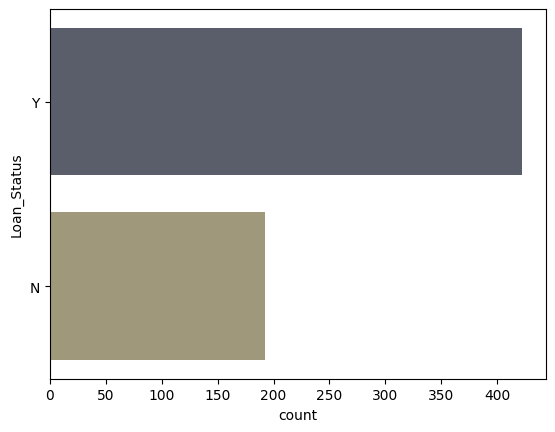

In [78]:
# Assuming 'Loan_Status' is a column name in your dataframe 'data'
xx = data['Loan_Status'].value_counts().reset_index()

# Correcting the sns.barplot code
sns.barplot(x='count', y='Loan_Status', data=xx, palette='cividis')

### Class Imbalance:

The outcome variable is mildly imbalanced. If the dataset were moderately or severely imbalanced, it would be best to oversample the minorty class or undersample the majority class. 

#### Some methods include:
    - Randomly choosing observations to over/undersample
    - SMOTE: synthetically creates new observations based on statistics

In [79]:
#Check for class imbalance
xx.head()

,Loan_Status,count
0,Y,422
1,N,192


### Exploratory Data Analysis (EDA)
Explore variable distributions and interactions

- Box plots, histograms, crosstabs

In [80]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: >

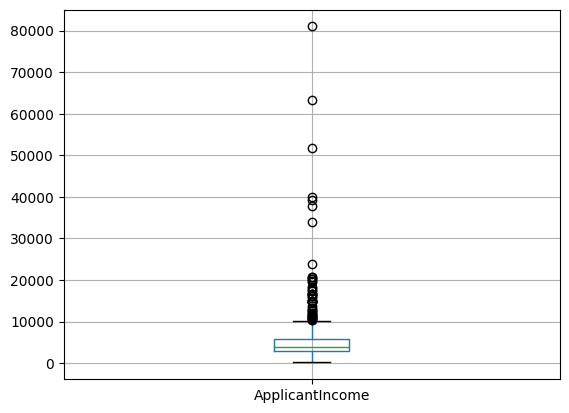

In [81]:
ApplicantIncome = data.boxplot(column = 'ApplicantIncome')
ApplicantIncome

## Income distribution across dataset

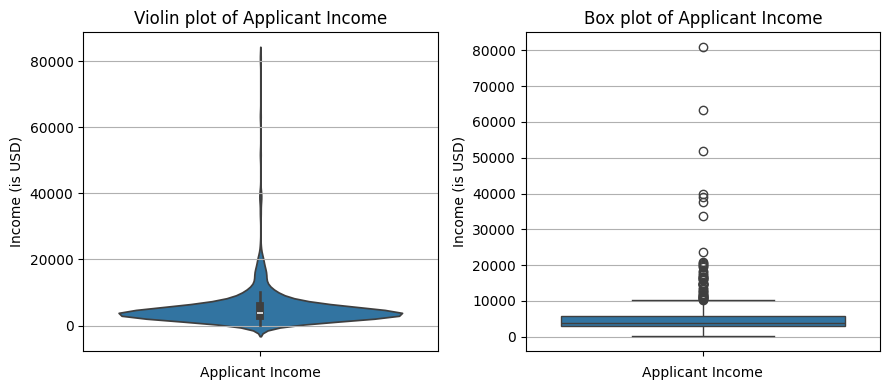

In [82]:
# Assuming 'data' is your DataFrame and 'ApplicantIncome' is the column of interest
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Generate the violin plot for 'ApplicantIncome'
sns.violinplot(y=data['ApplicantIncome'], ax=axs[0])
axs[0].set_title('Violin plot of Applicant Income')

# Generate the box plot for 'ApplicantIncome'
sns.boxplot(y=data['ApplicantIncome'], ax=axs[1])
axs[1].set_title('Box plot of Applicant Income')

# Adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xlabel('Applicant Income')
    ax.set_ylabel('Income (is USD)')

plt.tight_layout()
plt.show()

<Axes: >

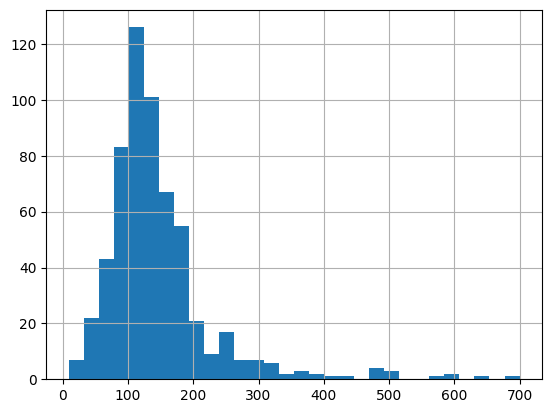

In [83]:
LoanAmount = data['LoanAmount'].hist(bins = 30)
LoanAmount

In [84]:
print(data.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [85]:
Property_Area = pd.crosstab(data['Property_Area'], data['Loan_Status'], margins = True)
Property_Area

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [86]:
Married = pd.crosstab(data['Married'], data['Loan_Status'], margins = True)
Married

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [87]:
CreditHistory = pd.crosstab(data['Credit_History'], data['Loan_Status'], margins = True)
CreditHistory

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [88]:
Gender = pd.crosstab(data['Gender'], data['Loan_Status'], margins = True)
Gender

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [89]:
Self_employed = pd.crosstab(data['Self_Employed'], data['Loan_Status'], margins = True)
Self_employed

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [90]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
data = data.dropna()

### Feature Engineering: Total Applicant Income 

To take into account both the borrower's and coborrower's (if applicable) income. 

In [92]:
data['TotalApplicantIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


/var/folders/bb/g0b3x6zs2l90112h4yj6yy400000gn/T/ipykernel_9463/3887109982.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Loan_Status', data=xx, palette='cividis')


<Axes: xlabel='count', ylabel='Loan_Status'>

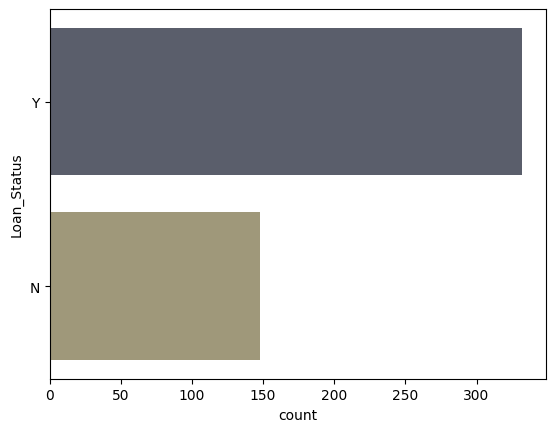

In [93]:
# Assuming 'Loan_Status' is a column name in your dataframe 'data'
xx = data['Loan_Status'].value_counts().reset_index()

# Correcting the sns.barplot code
sns.barplot(x='count', y='Loan_Status', data=xx, palette='cividis')

<Axes: >

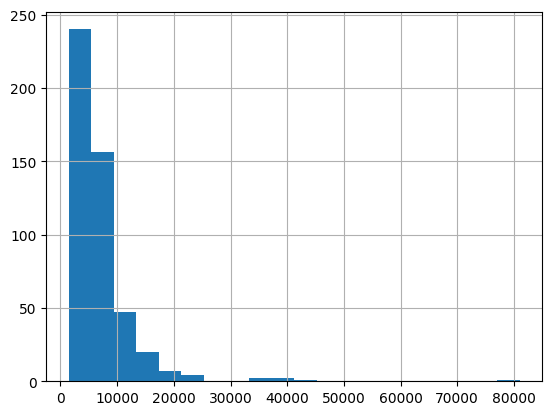

In [94]:
TotalAppInc_hist = data['TotalApplicantIncome'].hist(bins = 20)
TotalAppInc_hist

### Create dummy variables to prepare for Random Forest

In [95]:
data.astype({'Credit_History' : int})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y,7583.0


In [96]:
### Create dummy variables to prepare for Random Forest

data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)
data

data = pd.get_dummies(data, columns = ['Married'], drop_first = True)
data

data = pd.get_dummies(data, columns = ['Loan_Status'], drop_first = True)
data = data.rename(columns = {'Loan_Status_Y' : 'Loan_Approved'})
data

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalApplicantIncome,Gender_Male,Married_Yes,Loan_Approved
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0,True,True,False
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0,True,True,True
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4941.0,True,True,True
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,6000.0,True,False,True
5,LP001011,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,9613.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,2900.0,False,False,True
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,4106.0,True,True,True
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,8312.0,True,True,True
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,7583.0,True,True,True


In [97]:
data.astype({'Credit_History' : int})

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalApplicantIncome,Gender_Male,Married_Yes,Loan_Approved
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,6091.0,True,True,False
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,3000.0,True,True,True
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,4941.0,True,True,True
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,6000.0,True,False,True
5,LP001011,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,9613.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,2900.0,False,False,True
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,4106.0,True,True,True
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,8312.0,True,True,True
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,7583.0,True,True,True


### Random Forest Model: 
-Split training and testing data (80% & 20%)

-Forest of 100 trees

-Min 5 samples in a leaf to avoid too many splits

-Max depth of 4: 
    - Max depth of >4 was not adding to the model and predictive power
    - Max depth of 4 avoids overfitting
    
#### Explanatory/Dependent Variable (Y): 
Loan_Approved
#### Independent Variables: 
Gender, Married, TotalApplicantIncome, LoanAmount, Credit_History

In [98]:
#independent variables
features = ['Gender_Male', 'Married_Yes', 'TotalApplicantIncome', 'LoanAmount', 'Credit_History']
X = data[features]
#dependent variables
dependent = 'Loan_Approved'
y = data[dependent]
X.shape, y.shape

#split dataset into train (80%) and test (20%), shuffle observations
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10, shuffle = True)

#build random forest model, limit max depth to avoid overfitting
forest = RandomForestClassifier(max_depth=4, random_state = 10, n_estimators = 100, min_samples_leaf=5) 
model = forest.fit(x_train, y_train)
model

RandomForestClassifier(max_depth=4, min_samples_leaf=5, random_state=10)

### Feature Importance: 

Established Credit_History is the most important variable in predicting loan approval, followed by TotalApplicantIncome.

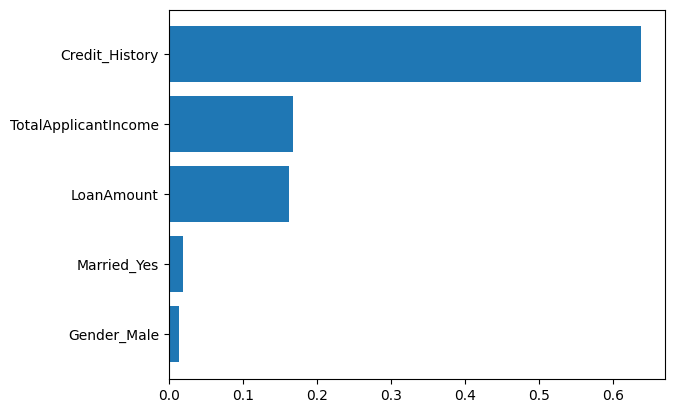

In [99]:
feature_importance = list(zip(features,forest.feature_importances_))
feature_importance.sort(key = lambda x : x[1])
plt.barh([x[0] for x in feature_importance],[x[1] for x in feature_importance])
plt.show()

## A Decision Tree from the Random Forest

- See sample tree in GitHub repository (.png)
- Gini Index: shows the explanatory power of a variable, is 0 when all samples are of the same class (best possible impurity and information gain)
- Class: shows the predicted class (0 = Not approved, 1 = Approved)

In [100]:
estimator = model.estimators_[50]
estimator
model.estimators_[50].tree_.max_depth

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (32,20), dpi=500)
sk.tree.plot_tree(estimator, filled=True, fontsize = 10, feature_names=features, class_names = True)
fig.savefig('DecisionTree.png')
#see sample tree in GitHub repository (.png)

## Accuracy, Precision, Recall, & F1 Score

#### Accuracy 

= (TP + TN) / (TP + TN + FP + FN) = TruePositives&Negatives / All 

What % of values were correctly predicted?


#### Precision 

= TP / (TP + FP) = TruePositive / PredictedPositives

What % of predicted positives are actually positive?


#### Recall 

= TP / (TP + FN) = TruePositive / ActualPositives

What % of actual positives are predicted positive?


#### F1 Score

= 2 * (Precision * Recall) / (Precision + Recall)

Balances Precision and Recall (weighted average), useful for datasets with class imbalance (observations have a large number of Actual Negatives), take false positives and negatives into account.

In [101]:
#Predicted Y (outcome) values for test and training observations
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

#Accuracy
accuracy_train = accuracy_score(y_train,pred_train)
accuracy_test = accuracy_score(y_test,pred_test)


#Precision
precision_train = sk.metrics.precision_score(y_train,pred_train)
precision_test = sk.metrics.precision_score(y_test,pred_test)

#Recall
recall_train = sk.metrics.recall_score(y_train,pred_train)
recall_test = sk.metrics.recall_score(y_test,pred_test)

#F1
f1_train = (2 * precision_train * recall_train) / (precision_train + recall_train)
f1_test = (2 * precision_test * recall_test) / (precision_test + recall_test)


print('Accuracy Train:',accuracy_train,'Accuracy Test:',accuracy_test)
print('Precision Train:',precision_train,'Precision Test:',precision_test)
print('Recall Train:',recall_train,'Recall Test:',recall_test)
print('F1 Train:',f1_train,'F1 Test:',f1_test)

Accuracy Train: 0.8098958333333334 Accuracy Test: 0.8020833333333334
Precision Train: 0.7962962962962963 Precision Test: 0.7790697674418605
Recall Train: 0.9735849056603774 Recall Test: 1.0
F1 Train: 0.8760611205432938 F1 Test: 0.8758169934640523


In [102]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

       False       1.00      0.34      0.51        29
        True       0.78      1.00      0.88        67

    accuracy                           0.80        96
   macro avg       0.89      0.67      0.69        96
weighted avg       0.85      0.80      0.77        96



## Business Context and Model Evaluation

From a business perspective, we want to avoid predicting a positve loan approval when it was actually denied (False Positives), so ***Precision*** will be our best measures for the model. This will ensure that we are accurately predicting loan approvals and that predicted approvals are actual approvals (precision). 

Since this model produces very similar precision scores on both the training and testing data, this model appears to be the best fit to maximize predictive power on the training dataset without overfitting and sacrificing predictability on the testing data. 

**Precision:** 
Precision on the testing data is ~78%, which means that we don't have a large amount of False Positives. This is great, because as a business, we want to avoid predicting loans approvals that will have to be denied later. 


**Accuracy:**
Accuracy on the testing data is ~80% which means that the model correctly predicts 4/5 of the loans. 


**Recall:**
 Recall on the testing data is 100% which means that the model accurately predicts all True Positives. This means that we will not miss out on any potential loan approvals (and revenue). 


**F1 Score:**
The F1 score on the testing data is ~88%, which is great since it takes into account both False Positives and False Negatives. 



## Symptoms of Overfitting and Underfitting: 

#### Overfitting: 
- Relies too much on the training data. Shows great performance on training data but a drop in performance on testing data.
- Need to reduce model complexity and remove layers & features from the model. 


#### Underfitting: 
- A failure to learn relationships in training data, poor performance on training data.
- Need to increase model complexity and add layers & features to the model.


#### This model does not show symptoms of Underfitting or Overfitting. 

In [44]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.42      0.58        31
           1       0.79      0.99      0.88        68

    accuracy                           0.81        99
   macro avg       0.86      0.70      0.73        99
weighted avg       0.83      0.81      0.78        99



## Confusion Matrix

- Identifies True Positives, True Negatives, False Positives, False Negatives based on Predicted and Actual Values in the following format:

|         |Predicted Negative|Predicted Positive|
|----               |----    |----    |
|**Actual Negative**|**TN**  | FP     |
|**Actual Positive**| FN     |**TP**  |


                                        FP is Type I error, FN is Type II error

In [45]:
confusion_matrix = confusion_matrix(y_test, pred_test)
confusion_matrix

array([[13, 18],
       [ 1, 67]])

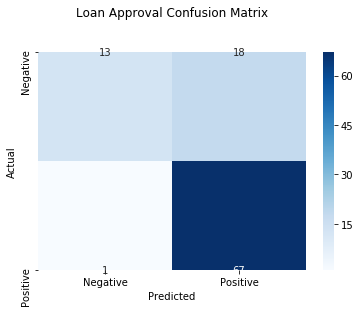

In [46]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt = '')

ax.set_title('Loan Approval Confusion Matrix\n\n');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])

## Display the visualization of the Confusion Matrix.
plt.show()

 #### Testing model prediction with new inputs to prepare for web app:

In [47]:
inputs = [[1, 1, 0, 71, 0]]

pred_inputs = model.predict(inputs)
pred_inputs[0]

0

#### Next steps: Use pickle file to transfer model to web app python code

In [103]:
pickle_out = open("Loan_Approval_Prediction.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()